## Numerical experiments math and Data Science Project
#### Authors: Beltrame and Marchionne

In the following, we are presenting the results of the numerical experiments associated to the following papers:

- Training ReLU networks to high uniform accuracy is intractable; Julius Berner; Philipp Grohs and Felix Voigtlaender


The numerical experiments aim to prove that we can find relevant and domain-specific problems of usign neural networks in solving even simple tasks.


## Target function: x $\rightarrow$ x^2

In the next line we are implementing some numerical experiments to visualize the infeasibility of learning.

In [12]:
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import pandas as pd
import time
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader
import torch.optim as optim

from sklearn.neural_network import MLPRegressor

import warnings
warnings.filterwarnings('ignore')

    
# custom
from Functions import plot_result, create_dataset, StudentTeacher, ModelEvaluator, StudentNet, TeacherNet

In [13]:
def compute_errors(predictions, targets):
    l1_error = np.mean(np.abs(predictions - targets))
    l2_error = np.mean(np.square(predictions - targets))
    linf_error = np.max(np.abs(predictions - targets))
    
    print("L1 Error: {:.4f}".format(l1_error))
    print("L2 Error: {:.4f}".format(l2_error))
    print("L-inf Error: {:.4f}".format(linf_error))
    
    return l1_error, np.sqrt(l2_error), linf_error

## Data

Since we had to discretize we chose to use as the ground truth a function with a point each 0.00001 unit of distance.
This corresponds to out fine grain resolution for the problem. 

It would be possible to increase the resolution but this would take quite a lot of computational time.

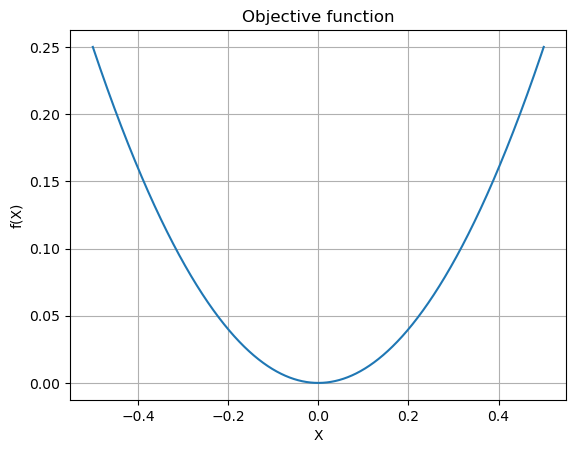

In [14]:
# define x
epsilon = 0.00001
x = np.arange(-0.5, 0.5, epsilon)
x_init = x
function = lambda x : x*x
fx = [function(e) for e in x]
plot_result(x_init, fx, "X", "f(X)", "Objective function")

x_train, x_test, y_train, y_test = create_dataset(x, fx)

[]

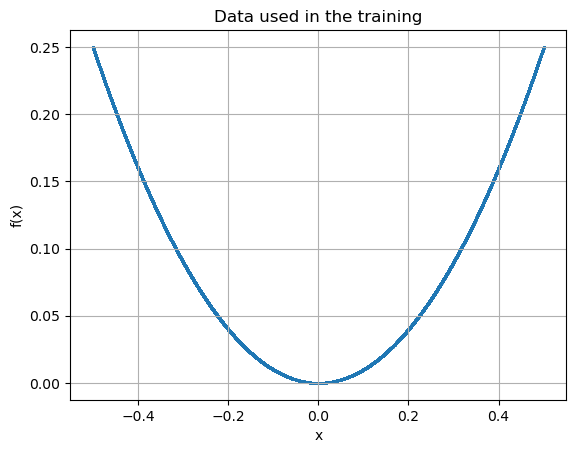

In [15]:
plt.scatter(x_train, y_train, 1)
plt.title("Data used in the training")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.grid()
plt.plot()

## Simple regressor

In [16]:
regr = MLPRegressor(random_state=42, max_iter=2000, hidden_layer_sizes = (15, 15, 15)).fit(x_train, y_train)

In [17]:
epsilon = 10
x_unif = np.linspace(-0.5, 0.5, epsilon).reshape(-1, 1) 
preds = regr.predict(x_test)
preds_unif = regr.predict(x_unif)
print("The score on the training set is: ", regr.score(x_test, y_test))
print("The score on the constant resolution, epsilon = 10, is: ", regr.score(x_unif, [function(e) for e in x_unif]))

The score on the training set is:  0.9998329226919532
The score on the constant resolution, epsilon = 10, is:  0.9996836397822916


In [18]:
# store the results
l1 = []
l2 = []
linf = []

The scores seem to be comparable in terms of R2 score. Let's analyse the scores induced by the L1, the L2 and the L-infinity norms. 

In [19]:
print("Test set")
MAD, MSE, INFN = compute_errors(preds, y_test.cpu().detach().numpy())

print("\nUniform resolution set")
l1_u, l2_u, linf_u = compute_errors(preds_unif, [function(e) for e in x_unif])
l1.append(l1_u)
l2.append(l2_u)
linf.append(linf_u)

Test set
L1 Error: 0.0828
L2 Error: 0.0110
L-inf Error: 0.2502

Uniform resolution set
L1 Error: 0.0986
L2 Error: 0.0159
L-inf Error: 0.2472


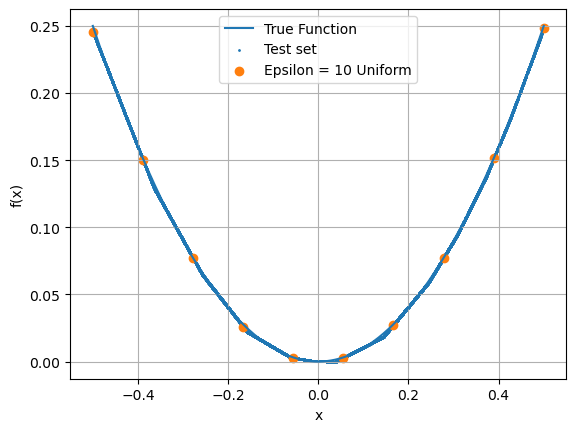

In [20]:
plt.scatter(x_test, preds, s=1, label="Test set")
plt.scatter(x_unif, preds_unif, label="Epsilon = 10 Uniform")
plt.plot(x_init, fx, label="True Function")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend()
plt.grid()

The results are good, we do not observe noticeable drifts from the main function. 

We now increase the epsilon value

In [21]:
epsilon = 30
x_unif = np.linspace(-0.5, 0.5, epsilon).reshape(-1, 1) 
print("The score on the training set is: ", regr.score(x_test, y_test))
print("The score on the constant resolution, epsilon = 10, is: ", regr.score(x_unif, [function(e) for e in x_unif]))

print("\nTest set")
MAD, MSE, INFN = compute_errors(preds, y_test.cpu().detach().numpy())

print("\nUniform resolution set")
l1_u, l2_u, linf_u = compute_errors(preds_unif, [function(e) for e in x_unif])
l1.append(l1_u)
l2.append(l2_u)
linf.append(linf_u)

The score on the training set is:  0.9998329226919532
The score on the constant resolution, epsilon = 10, is:  0.999761712775944

Test set
L1 Error: 0.0828
L2 Error: 0.0110
L-inf Error: 0.2502

Uniform resolution set
L1 Error: 0.0950
L2 Error: 0.0144
L-inf Error: 0.2480


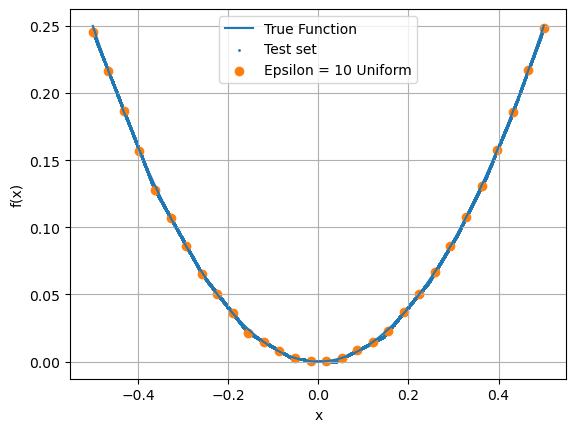

In [22]:
preds_unif = regr.predict(x_unif)

plt.scatter(x_test, preds, s=1, label="Test set")
plt.scatter(x_unif, preds_unif, label="Epsilon = 10 Uniform")
plt.plot(x_init, fx, label="True Function")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend()
plt.grid()

The results are still really good. We are incresing a lot the value of epsilo this time.

In [23]:
epsilon = 200
x_unif = np.linspace(-0.5, 0.5, epsilon).reshape(-1, 1) 
print("The score on the training set is: ", regr.score(x_test, y_test))
print("The score on the constant resolution, epsilon = 30, is: ", regr.score(x_unif, [function(e) for e in x_unif]))

print("\nTest set")
MAD, MSE, INFN = compute_errors(preds, y_test.cpu().detach().numpy())

print("\nUniform resolution set")
l1_u, l2_u, linf_u = compute_errors(preds_unif, [function(e) for e in x_unif])
l1.append(l1_u)
l2.append(l2_u)
linf.append(linf_u)

The score on the training set is:  0.9998329226919532
The score on the constant resolution, epsilon = 10, is:  0.99982926466185

Test set
L1 Error: 0.0828
L2 Error: 0.0110
L-inf Error: 0.2502

Uniform resolution set
L1 Error: 0.0865
L2 Error: 0.0120
L-inf Error: 0.2499


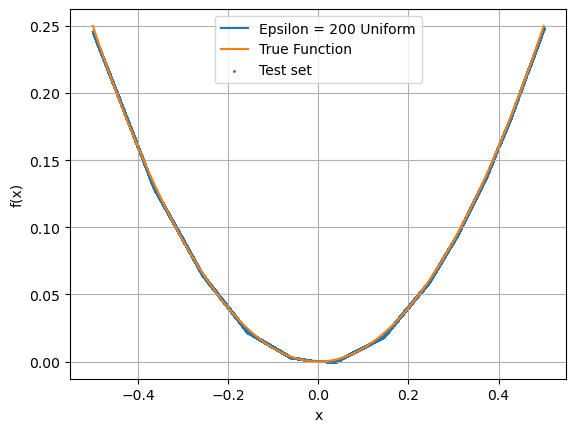

In [31]:
preds_unif = regr.predict(x_unif)

plt.scatter(x_test, preds, s=1, label="Test set")
plt.plot(x_unif, preds_unif, label="Epsilon = 200 Uniform")
plt.plot(x_init, fx, label="True Function")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend()
plt.grid()

Let's have a closer look

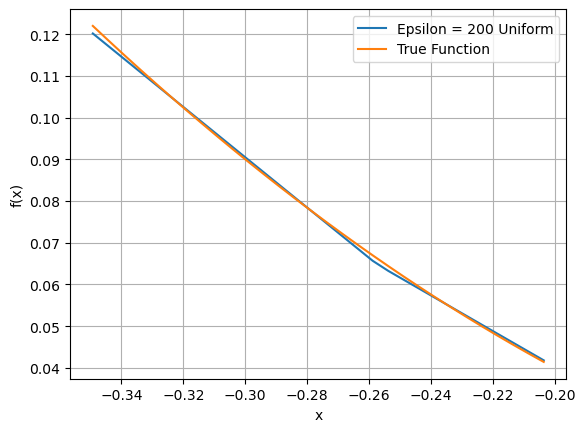

In [37]:
plt.plot(x_unif[30:60], preds_unif[30:60], label="Epsilon = 200 Uniform")
plt.plot(x_unif[30:60], [function(x) for x in x_unif[30:60]], label="True Function")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend()
plt.grid()

In [38]:
epsilon = 2000
x_unif = np.linspace(-0.5, 0.5, epsilon).reshape(-1, 1) 
print("The score on the training set is: ", regr.score(x_test, y_test))
print("The score on the constant resolution, epsilon = 30, is: ", regr.score(x_unif, [function(e) for e in x_unif]))

print("\nTest set")
MAD, MSE, INFN = compute_errors(preds, y_test.cpu().detach().numpy())

print("\nUniform resolution set")
l1_u, l2_u, linf_u = compute_errors(preds_unif, [function(e) for e in x_unif])
l1.append(l1_u)
l2.append(l2_u)
linf.append(linf_u)

The score on the training set is:  0.9998329226919532
The score on the constant resolution, epsilon = 30, is:  0.9998350312536853

Test set
L1 Error: 0.0828
L2 Error: 0.0110
L-inf Error: 0.2502

Uniform resolution set
L1 Error: 0.0837
L2 Error: 0.0112
L-inf Error: 0.2502


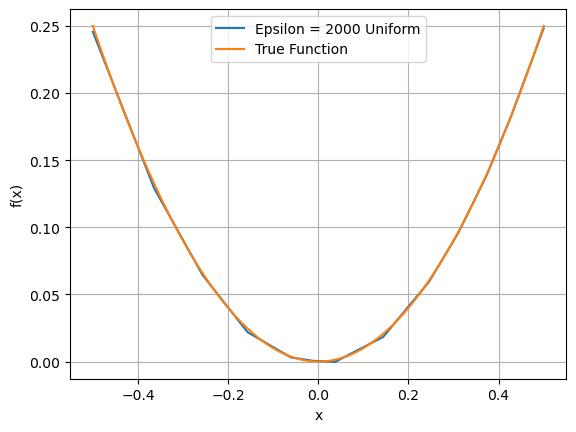

In [41]:
preds_unif = regr.predict(x_unif)

plt.plot(x_unif, preds_unif, label="Epsilon = 2000 Uniform")
plt.plot(x_init, fx, label="True Function")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend()
plt.grid()

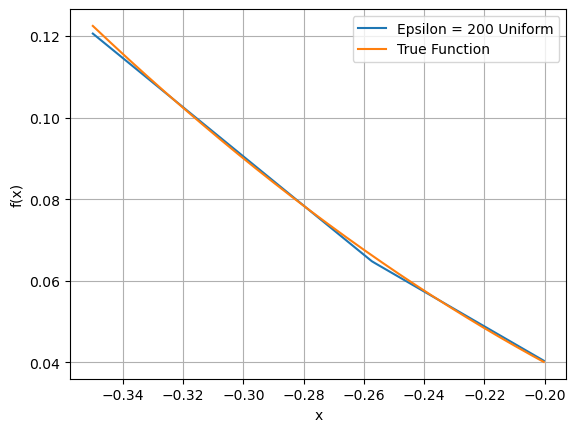

In [45]:
plt.plot(x_unif[300:600], preds_unif[300:600], label="Epsilon = 2000 Uniform")
plt.plot(x_unif[300:600], [function(x) for x in x_unif[300:600]], label="True Function")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend()
plt.grid()

Having increased the resolution we are inspecting the function by a factor of ten it is remarkable to notice that it was not only a an unlucky point sampled by the uniform distribution, but there are sctructural limits on the learning we can perform.

#### Increase the data points in the training
Let's increase the number of data points by an order 10 when we train the model on and see the result in the same setting.

In [ ]:
# define x
epsilon = 0.000001
x = np.arange(-0.5, 0.5, epsilon)
x_init = x
function = lambda x : x*x
fx = [function(e) for e in x]
plot_result(x_init, fx, "X", "f(X)", "Objective function")

x_train, x_test, y_train, y_test = create_dataset(x, fx)

## Numerical experiments math and Data Science Project
#### Authors: Beltrame and Marchionne

In the following, we are presenting the results of the numerical experiments associated to the following papers:

- Training ReLU networks to high uniform accuracy is intractable; Julius Berner; Philipp Grohs and Felix Voigtlaender


The numerical experiments aim to prove that we can find relevant and domain-specific problems of usign neural networks in solving even simple tasks.


## Target function: x $\rightarrow$ log(sin(50x) + 2) + sin(5x)

In the next line we are implementing some numerical experiments to visualize the infeasibility of leanring.